In [24]:
graphics_toolkit("gnuplot"); % this line is needed only in Octave

## Analytické řešení difúzní úlohy v 1d + přidání konvektivního a reaktivního členu
Úloha se smíšenými okrajovými podmínkami

ans = -34.622
ans = -34.622
ans = -34.622
ans = -34.622


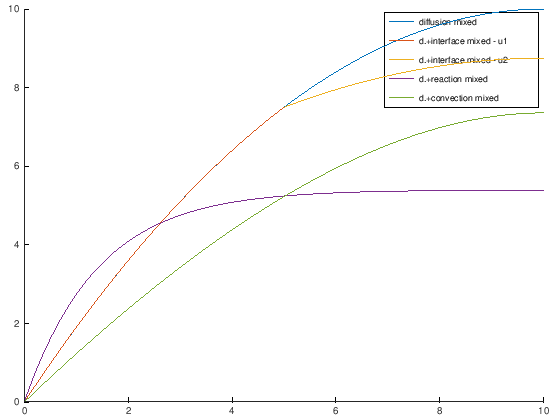

In [34]:
%% define 1d domain (0,L) and constants
L=10;
x=linspace(0,L,100);    % points of visualization
f=0.2;                  % sources (constant in whole domain
k=1;                    % material parameter (e.g. conductivity)
U=0;                    % Dirichlet boundary condition
T=0;                    % Neumann boundary condition
legend_items={};        % empty cell prepared for legend
figure; hold on         % empty figure

%% Diffusion with mixed boundary conditions
% plot of the analytical solution
%   -k*u''(x)=f     in (0,L)
%        u(0)=U
%    -k*u'(L)=T
u=@(x)-f/(2*k)*x.^2+(f*L-T)*x/k+U;
plot(x,u(x))            % plot of the analytical solution
legend_items{end+1}='diffusion mixed';      % append legend

%% Diffusion with mixed boundary conditions + material interface
%   -k1*u1''(x)=f   in (0,M)
%   -k2*u2''(x)=f   in (M,L)
%   u1(0)=U
%   -k2*u2'(L)=T
%   u1(M)=u2(M)
%   k1*u1'(M+)=k2*u2'(M-)
k1=k;   % EXAMINE EFFECT OF CHANGING THIS CONSTANT
k2=2*k; % EXAMINE EFFECT OF CHANGING THIS CONSTANT
M=5;
% analytical solution:
C2=U;
D1=(f*L-T)/k2;
C1=D1*k2/k1;
D2=-f/(2*k1)*M^2+C1*M+C2+f/(2*k2)*M^2-D1*M;
u1=@(x)-f/(2*k1)*x.^2+C1*x+C2;
u2=@(x)-f/(2*k2)*x.^2+D1*x+D2;
x1=linspace(0,M,100); x2=linspace(M,L,100); % points of visualization
plot(x1,u1(x1)); plot(x2,u2(x2))   % plot of the analytical solution
legend_items{end+1}='d.+interface mixed - u1';	% append legend
legend_items{end+1}='d.+interface mixed - u2';	% append legend

%% Diffusion with mixed boundary conditions + reaction
%   -k*u''(x)+k0*u(x)=g     in (0,L)
%                u(0)=U
%            -k*u'(L)=T
k0=0.5;	% EXAMINE EFFECT OF CHANGING THIS CONSTANT
Uhat=5;	% EXAMINE EFFECT OF CHANGING THIS CONSTANT
g=f+k0*Uhat;
% analytical solution:
K=sqrt(k0/k);
C1=(T/k+(U-g/k0)*K*exp(K*L))/K/(exp(-K*L)+exp(K*L));
C2=U-C1-g/k0;
u=@(x)C1*exp(-K*x)+C2*exp(K*x)+g/k0;
plot(x,u(x))   % plot of the analytical solution
legend_items{end+1}='d.+reaction mixed';    % append legend

%% Diffusion with mixed boundary conditions + convection
%   -k*u''(x)+D*u'(x)=f     in (0,L)
%   u(0)=U
%   -k*u'(l)=T
D=0.1;    % EXAMINE EFFECT OF CHANGING THIS CONSTANT
% analytical solution:
C2=(-T/k-f/D)/(D/k*exp(D*L/k));
C1=U-C2;
u=@(x)C1+C2*exp(D/k*x)+f/D*x;
plot(x,u(x))            % plot of the analytical solution
legend_items{end+1}='d.+convection mixed';  % append legend

legend(legend_items);                       % show legend
grid on